In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**K-Means sur un ensemble de données synthétiques**

Tout d'abord, nous devons définir une graine aléatoire. Utilisez la fonction random.seed() de numpy, où la graine sera fixée à 0.

In [3]:
np.random.seed(0)

Ensuite, nous allons créer des groupes de points aléatoires en utilisant la classe make_blobs. La classe make_blobs peut recevoir de nombreuses entrées, mais nous utiliserons celles qui suivent.

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Affichez le diagramme de dispersion des données générées aléatoirement.

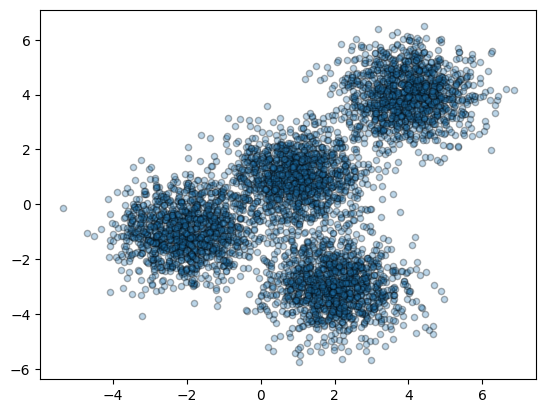

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

**Mise en place de k-means**

Maintenant que nous disposons de nos données aléatoires, configurons notre regroupement k-means.

La classe KMeans possède de nombreux paramètres qui peuvent être utilisés, mais nous utiliserons ces trois paramètres :

init : Méthode d'initialisation des centroïdes.
La valeur sera : k-means++
k-means++ : sélectionne les centres de cluster initiaux pour le clustering k-means de manière intelligente afin d'accélérer la convergence.
n_clusters : Le nombre de grappes à former ainsi que le nombre de centroïdes à générer.
La valeur sera : 4 (puisque nous avons 4 centres)
n_init : Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines de centroïdes. Le résultat final sera le meilleur résultat de n_init exécutions consécutives en termes d'inertie.
La valeur sera : 12
Initialiser KMeans avec ces paramètres, où la variable de sortie est appelée k_means.

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
# Ajustons maintenant le modèle KMeans à la matrice de caractéristiques que nous avons créée ci-dessus, X .
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Obtenons maintenant l'étiquette de chaque point du modèle à l'aide de l'attribut k_means.labels_ et sauvegardons-les sous le nom k_means_labels.

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 0, ..., 1, 2, 2], dtype=int32)

Nous obtiendrons également les coordonnées des centres des grappes en utilisant k_means.cluster_centers_ et en l'enregistrant sous k_means_cluster_centers.

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.99876902, -3.01796355],
       [ 3.97334234,  3.98758687],
       [-2.03556986, -0.99814034],
       [ 0.96900523,  0.98370298]])

**Création du graphe visuel**

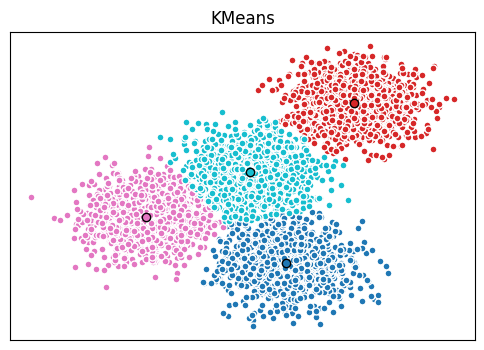

In [11]:
# Initialise le graphe avec les dimensions spécifiées.
fig = plt.figure(figsize=(6, 4))

# Colors utilise une carte de couleurs, qui produira un tableau de couleurs basé sur
# le nombre d'étiquettes qu'il y a. Nous utilisons set(k_means_labels) pour obtenir les
# étiquettes uniques.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Création d'une parcelle
ax = fig.add_subplot(1, 1, 1)

# Pour la boucle qui trace les points de données et les centroïdes.
# k sera compris entre 0 et 3, ce qui correspondra aux regroupements possibles de chaque point de données.
# point de données.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Créer une liste de tous les points de données, où les points de données qui sont
    # dans le cluster (ex. cluster 0) sont étiquetés comme vrais, sinon ils sont
    # sont étiquetés comme faux.
    my_members = (k_means_labels == k)

    # Définir le centroïde, ou centre de la grappe.
    cluster_center = k_means_cluster_centers[k]

    # Trace les points de données avec la couleur col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Trace les centroïdes avec la couleur spécifiée, mais avec un contour plus sombre
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_title('KMeans')

# Supprimer les coches de l'axe des abscisses
ax.set_xticks(())

# Supprimer les coches de l'axe des ordonnées
ax.set_yticks(())

# Afficher le graphe
plt.show()


Exercice 1 : Essayez de regrouper l'ensemble de données ci-dessus en un nombre différent de grappes, par exemple k=3. Notez la différence dans le modèle généré.

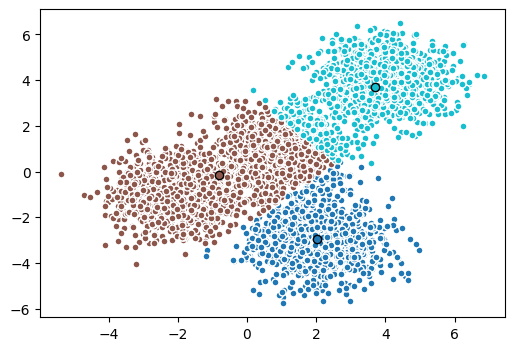

In [13]:
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

Exercise 2
Essayez la même chose avec k=5.

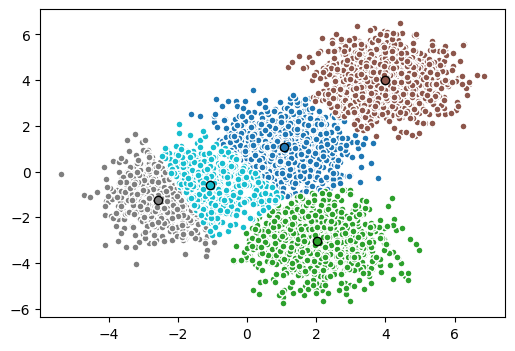

In [15]:
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

Exercice 3
Commentez la somme des carrés à l'intérieur des clusters, c'est-à-dire l'inertie, des clusters créés pour k=3 et k=5.

--------------------------------------------------------------------------
Pour k=3, la valeur de la somme des carrés à l'intérieur d'une grappe sera plus élevée que pour k=4, car les points provenant de différentes grappes naturelles sont regroupés, ce qui entraîne un sous-ajustement du modèle des k-moyennes. Pour k=5, la valeur de sera inférieure à celle de k=4, car les points sont répartis dans plus de grappes que nécessaire, ce qui entraîne un surajustement du modèle des k-moyennes.

# **Segmentation personnalisée avec les k-moyennes**

Imaginez que vous disposiez d'un ensemble de données sur les clients et que vous deviez appliquer la segmentation de la clientèle à ces données historiques. La segmentation de la clientèle consiste à diviser une base de clients en groupes d'individus présentant des caractéristiques similaires. Il s'agit d'une stratégie importante car une entreprise peut cibler ces groupes spécifiques de clients et allouer efficacement les ressources marketing. Par exemple, un groupe peut contenir des clients à forte rentabilité et à faible risque, ou plus susceptibles d'acheter des produits ou de s'abonner à un service. La tâche de l'entreprise consiste à fidéliser ces clients.

In [16]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


**Prétraitement**

Comme vous pouvez le constater, l'adresse dans cet ensemble de données est une variable catégorielle. L'algorithme k-means ne fonctionne pas directement avec les variables catégorielles car la fonction de distance euclidienne n'a pas de sens pour elles. Vous pourriez coder la caractéristique catégorielle en une seule fois, mais à des fins d'illustration, exécutons le regroupement k-means sans cette caractéristique.

In [17]:
cust_df = cust_df.drop('Address', axis=1)

In [18]:
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [19]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

**Modelisation**

Exercice 4
Écrivez le code pour regrouper les données avec k=3. Extrayez les étiquettes de cluster pour ce processus de clustering.

In [20]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

**Insights**
Nous attribuons les étiquettes des grappes k-means à chaque ligne de la base de données.

In [21]:
cust_df["Clus_km"] = labels

Nous pouvons facilement vérifier les valeurs du centroïde en calculant la moyenne des caractéristiques de chaque grappe. Ces valeurs indiquent le point central de la grappe du point de vue du champ en question.

In [22]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
1,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


Examinons maintenant la répartition des clients en fonction de leur formation, de leur âge et de leur revenu. Nous pouvons choisir de visualiser cela sous la forme d'un diagramme de dispersion en 2D avec l'âge en abscisse, le revenu en ordonnée et la taille du marqueur représentant l'éducation. Les points du nuage de points se verront attribuer des couleurs différentes en fonction des différentes étiquettes de classe.

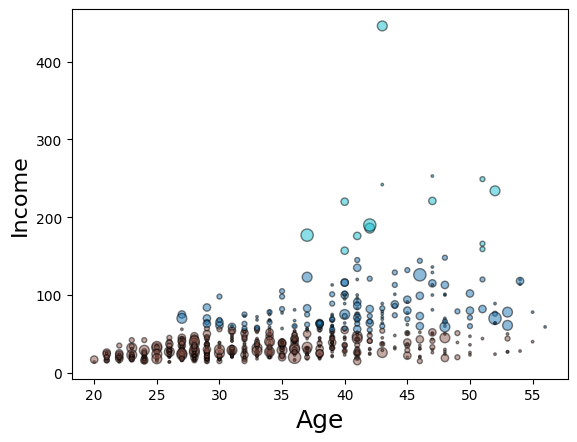

In [23]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

Pour une meilleure compréhension, nous pouvons également visualiser cette distribution en trois dimensions. Ici, le paramètre de l'éducation représentera le troisième axe au lieu de la taille du marqueur.

In [24]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()

In [25]:

# Analyze the clusters and create profiles based on the mean values of each cluster
cluster_profiles = cust_df.groupby('Clus_km').mean()

# Create profiles for each cluster based on observations from the scatter plots and mean values
print("Cluster Profiles:")

# Cluster 0
print("Cluster 0:")
print("Profile: This cluster appears to represent individuals with a medium-to-high income, moderate education, and a slightly younger age.")
print(cluster_profiles.loc[0])
print("\n")

# Cluster 1
print("Cluster 1:")
print("Profile: This cluster appears to represent individuals with a lower income, moderate education, and slightly older age.")
print(cluster_profiles.loc[1])
print("\n")


# Cluster 2
print("Cluster 2:")
print("Profile: This cluster appears to represent a group of people with a higher income, higher education, and slightly older age.")
print(cluster_profiles.loc[2])
print("\n")


Cluster Profiles:
Cluster 0:
Profile: This cluster appears to represent individuals with a medium-to-high income, moderate education, and a slightly younger age.
Customer Id        403.561290
Age                 41.103226
Edu                  1.916129
Years Employed      15.135484
Income              81.122581
Card Debt            3.024935
Other Debt           5.605258
Defaulted            0.180645
DebtIncomeRatio     10.848387
Name: 0, dtype: float64


Cluster 1:
Profile: This cluster appears to represent individuals with a lower income, moderate education, and slightly older age.
Customer Id        439.802260
Age                 32.775895
Edu                  1.632768
Years Employed       6.169492
Income              30.642185
Card Debt            1.003795
Other Debt           2.090910
Defaulted            0.284369
DebtIncomeRatio     10.146893
Name: 1, dtype: float64


Cluster 2:
Profile: This cluster appears to represent a group of people with a higher income, higher education, and

In [26]:
# prompt: The 3 clusters can be:
# LATE CAREER, AFFLUENT, AND EDUCATED
# MID CAREER AND MIDDLE INCOME
# EARLY CAREER AND LOW INCOME

# Analyze the clusters and create profiles based on the mean values of each cluster
cluster_profiles = cust_df.groupby('Clus_km').mean()

# Create profiles for each cluster based on observations from the scatter plots and mean values
print("Cluster Profiles:")

# Cluster 0
print("Cluster 0: EARLY CAREER AND LOW INCOME")
print(cluster_profiles.loc[0])
print("\n")

# Cluster 1
print("Cluster 1: MID CAREER AND MIDDLE INCOME")
print(cluster_profiles.loc[1])
print("\n")


# Cluster 2
print("Cluster 2: LATE CAREER, AFFLUENT, AND EDUCATED")
print(cluster_profiles.loc[2])
print("\n")


Cluster Profiles:
Cluster 0: EARLY CAREER AND LOW INCOME
Customer Id        403.561290
Age                 41.103226
Edu                  1.916129
Years Employed      15.135484
Income              81.122581
Card Debt            3.024935
Other Debt           5.605258
Defaulted            0.180645
DebtIncomeRatio     10.848387
Name: 0, dtype: float64


Cluster 1: MID CAREER AND MIDDLE INCOME
Customer Id        439.802260
Age                 32.775895
Edu                  1.632768
Years Employed       6.169492
Income              30.642185
Card Debt            1.003795
Other Debt           2.090910
Defaulted            0.284369
DebtIncomeRatio     10.146893
Name: 1, dtype: float64


Cluster 2: LATE CAREER, AFFLUENT, AND EDUCATED
Customer Id        374.000000
Age                 44.785714
Edu                  3.000000
Years Employed      17.857143
Income             219.714286
Card Debt            6.115429
Other Debt          11.546357
Defaulted            0.285714
DebtIncomeRatio      8.0

In [28]:

import plotly.graph_objects as go

# Assuming you have your data in X and labels as before
# X is a NumPy array or Pandas DataFrame with 3 columns (x, y, z coordinates)
# labels is a NumPy array or Pandas Series with the cluster labels

fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,  # set color to an array/list of desired values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)])

# Customize the layout (optional)
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

fig.show()
